In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from types import SimpleNamespace
from copy import deepcopy

In [2]:
with open('grid-host.csv', 'r') as f:
    lines = f.readlines()
    key_list = [key.strip('\n') for key in lines[0].split(',')]
    grid = {key: [] for key in key_list}
    for line in lines[1:]:
        line_split = line.split(",")
        for i, datum in enumerate(line_split):
            grid[key_list[i]].append(float(datum))

grid = {key: np.array(value) for (key, value) in grid.items()}
grid = SimpleNamespace(**grid)
grid.dx = 1 / 2**grid.L
grid.x = grid.i * grid.dx + grid.dx / 2
grid.y = grid.j * grid.dx + grid.dx / 2
grid.z = grid.k * grid.dx + grid.dx / 2
grid.r = np.sqrt((grid.x - 0.5)**2 + (grid.y - 0.5)**2 + (grid.z - 0.5)**2)


In [3]:
# check that leaf cells sum to unity
np.sum(grid.dx[grid.flag_leaf == 1]**3)


1.0

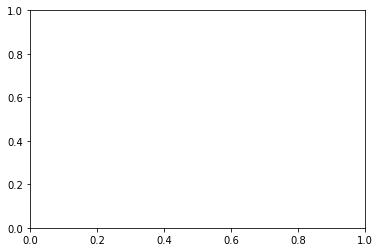

In [4]:
sigma = 0.001 #same as in .h file
def rho_func(x, y, z, x0=0.5, y0=0.5, z0=0.5, sigma=sigma):
    rsq = (x - x0)**2 + (y - y0)**2 + (z - z0)**2
    return np.exp(-rsq / (2 * sigma)) / np.sqrt(2 * np.pi * sigma**3)

def plot_rho_grad_slice(z, L=[0, 1, 2], num=50, ax=plt.gca()):
    coord_min = grid.z - 1 / 2**(grid.L + 1)
    coord_max = grid.z + 1 / 2**(grid.L + 1)
    cond = (z >= coord_min) & (z <= coord_max)
    cond &= np.array(list(map(lambda x: x in L, grid.L)))
    #print(cond)
    x_grid, y_grid = np.meshgrid(np.linspace(0, 1, num), np.linspace(0, 1, num), indexing='ij')
    rho_grad_x_grid = griddata((grid.x[cond], grid.y[cond]), grid.rho_grad_x[cond], (x_grid, y_grid), fill_value=0)
    im = ax.contourf(x_grid, y_grid, rho_grad_x_grid, levels=200)
    return im, rho_grad_x_grid

def plot_rho_slice(z, L=[0, 1, 2], num=50):
    coord_min = grid.z - 1 / 2**(grid.L + 1)
    coord_max = grid.z + 1 / 2**(grid.L + 1)
    cond = (z >= coord_min) & (z <= coord_max)
    cond &= np.array(list(map(lambda x: x in L, grid.L)))
    x_grid, y_grid = np.meshgrid(np.linspace(0, 1, num), np.linspace(0, 1, num), indexing='ij')
    rho_grid = griddata((grid.x[cond], grid.y[cond]), grid.rho[cond], (x_grid, y_grid), fill_value=0)
    im = plt.contourf(x_grid, y_grid, rho_grid, levels=200)
    return im

def plot_grid_slice(z, color='black', L=[0, 1, 2]):
    coord_min = [coord - 1 / 2**(grid.L + 1) for coord in [grid.x, grid.y, grid.z]]
    coord_max = [coord + 1 / 2**(grid.L + 1) for coord in [grid.x, grid.y, grid.z]]
    cond = (z >= coord_min[2]) & (z <= coord_max[2])
    #print(cond)
    cond &= np.array(list(map(lambda x: x in L, grid.L)))
    #print(cond)
    plt.plot(np.array([coord_min[0][cond], coord_min[0][cond], coord_max[0][cond], coord_max[0][cond], coord_min[0][cond]]), np.array([coord_min[1][cond], coord_max[1][cond], coord_max[1][cond], coord_min[1][cond], coord_min[1][cond]]), color=color, lw=0.5)

In [5]:
try:
    plt_default_size
except:
    plt_default_size = plt.rcParams["figure.figsize"]
    
plt.rcParams["figure.figsize"] = plt_default_size
plt.show()
plt.close()

In [6]:
print(plt_default_size)
z = 0.5
im = plot_rho_slice(z)
plot_grid_slice(z, color='grey')

plt.rcParams["figure.figsize"] = [1.8 * i for i in deepcopy(plt_default_size)]
plt.gca().set_aspect(1.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$z = %.3g$' % z)
plt.colorbar()
plt.show()
plt.close()

[6.0, 4.0]


AttributeError: 'numpy.ndarray' object has no attribute 'apply'

: 

In [ ]:
grid.z[grid.L==1]
coord_min = grid.z - 1 / 2**(grid.L + 1)
coord_max = grid.z + 1 / 2**(grid.L + 1)
cond = (z >= coord_min[grid.L==1]) & (z <= coord_max[grid.L==1])
cond

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
grid.L

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 2., 0., 2.,
       1., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2.])

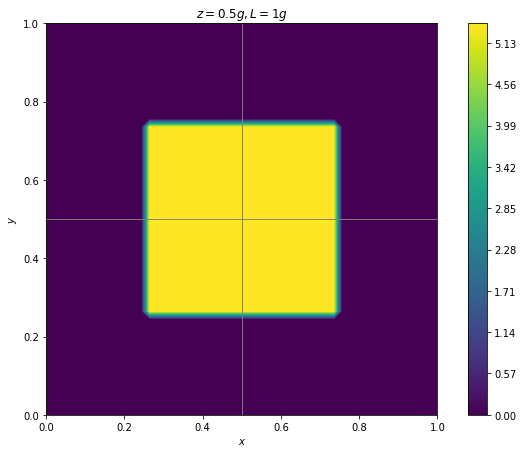

: 

In [ ]:
z = 0.5
L = 1
im = plot_rho_slice(z, L)
plot_grid_slice(z, color='grey', L=L)

plt.gca().set_aspect(1.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(f'$z = {z}g, L = {L}g$')
plt.colorbar()
plt.show()
plt.close()